# Boosting Techniques

1: What is Boosting in Machine Learning? Explain how it improves weak learners.
 - Boosting is an ensembling technique that combines multiple weak learners to build a strong model. Every model build sequentially in boosting. and the model which give less accuracy the model gives more weightage to that model and reduce the weightage of corrected predictions so that lower accuracy model improves and overall the model gives a more reliable accuracy.

2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
- AdaBoost → Increases weights of misclassified samples so the next model focuses more on them.

- Gradient Boosting → Trains each new model on the residual errors and directly minimizes a loss function using gradient descent.

 3: How does regularization help in XGBoost?
 - Regularization in XGBoost adds a penalty to complex trees, making the model simpler, more stable, and better at predicting unseen data.

4: Why is CatBoost considered efficient for handling categorical data?

- CatBoost efficiently handles categorical data because it uses advanced internal encoding techniques that avoid overfitting and eliminate the need for manual preprocessing.

5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

- Boosting is preferred in:

- Fraud detection

- Loan default prediction

- Customer churn prediction

- Medical diagnosis

- Search ranking & recommendation systems

- It is used when high accuracy and handling complex patterns are more important than simple variance reduction (as in bagging).

In [12]:
# Write a Python program to:
# Train an AdaBoost Classifier on the Breast Cancer dataset
# Print the model accuracy

import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
x = data.data
y = data.target


# Train_Test_Split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.3,random_state = 42)


# Model training
stump = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=stump,n_estimators=50,random_state=42,learning_rate = 1.0)
model.fit(x_train,y_train)

# Predict
y_pred = model.predict(x_test)

# Accuracy
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.9707602339181286


In [20]:
#7: Write a Python program to:
# Train a Gradient Boosting Regressor on the California Housing dataset
# Evaluate performance using R-squared score

import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
x = data.data
y = data.target

# Train_Test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.3,random_state = 42)

# Model Training
model = AdaBoostRegressor(n_estimators = 100,random_state = 32,learning_rate=1.0)
model.fit(x_train,y_train)

# model prediction
y_pred = model.predict(x_test)

# Model accuracy
print('R2 Score:',r2_score(y_test,y_pred))

R2 Score: 0.5247263607884014


In [31]:
#8 Write a Python program to:
# Train an XGBoost Classifier on the Breast Cancer dataset
# Tune the learning rate using GridSearchCV
# Print the best parameters and accuracy

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier

data = load_breast_cancer()
x = data.data
y = data.target

# train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 34)

# tuning the model by gridsearch

hyper_param = ({
    'n_estimators':[100,200,300],
    'learning_rate':[0.1,0.5,1.0],
    'max_depth':[3,5,7,9]
})

grid = GridSearchCV(estimator= XGBClassifier(random_state=42),param_grid = hyper_param, cv = 5, scoring = 'accuracy',n_jobs = -1)

grid.fit(x_train,y_train)

print(grid.best_params_)
print(grid.best_score_)



{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.964835164835165


Accuracy: 0.9736842105263158


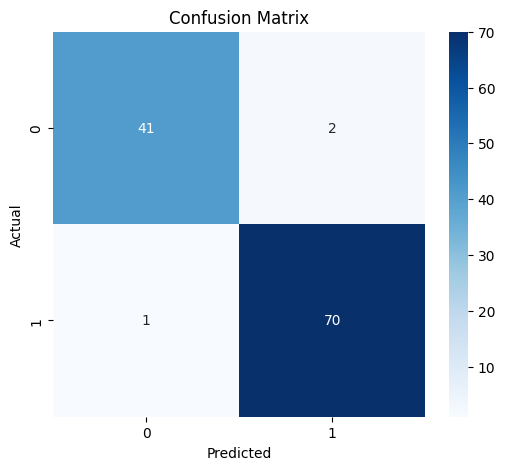

In [33]:
# 9: Write a Python program to:
# Train a CatBoost Classifier
# Plot the confusion matrix using seaborn

# Install (only if not installed)
# !pip install catboost

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

 10. You're working for a FinTech company trying to predict loan default using
 customer demographics and transaction behavior.

 The dataset is imbalanced, contains missing values, and has both numeric and
 categorical features.

 Describe your step-by-step data science pipeline using boosting techniques:

 ● Data preprocessing & handling missing/categorical values
 ● Choice between AdaBoost, XGBoost, or CatBoost
 ● Hyperparameter tuning strategy
 ● Evaluation metrics you'd choose and why
 ● How the business would benefit from your model

- I would preprocess the data by handling missing values and encoding categorical variables appropriately.
Since the dataset is imbalanced, I would apply class weighting and optimize threshold selection.
I would prefer CatBoost if categorical features dominate, otherwise XGBoost for strong tabular performance.
 I would tune hyperparameters using cross-validation and early stopping. Evaluation would focus on ROC-AUC, Recall,
 and F1-score instead of accuracy. The final deployed model would help the company reduce default risk
 , improve credit decisions, and increase profitability.